# M4_1. 다음 증권 페이지 크롤링

In [17]:
from IPython.display import Image

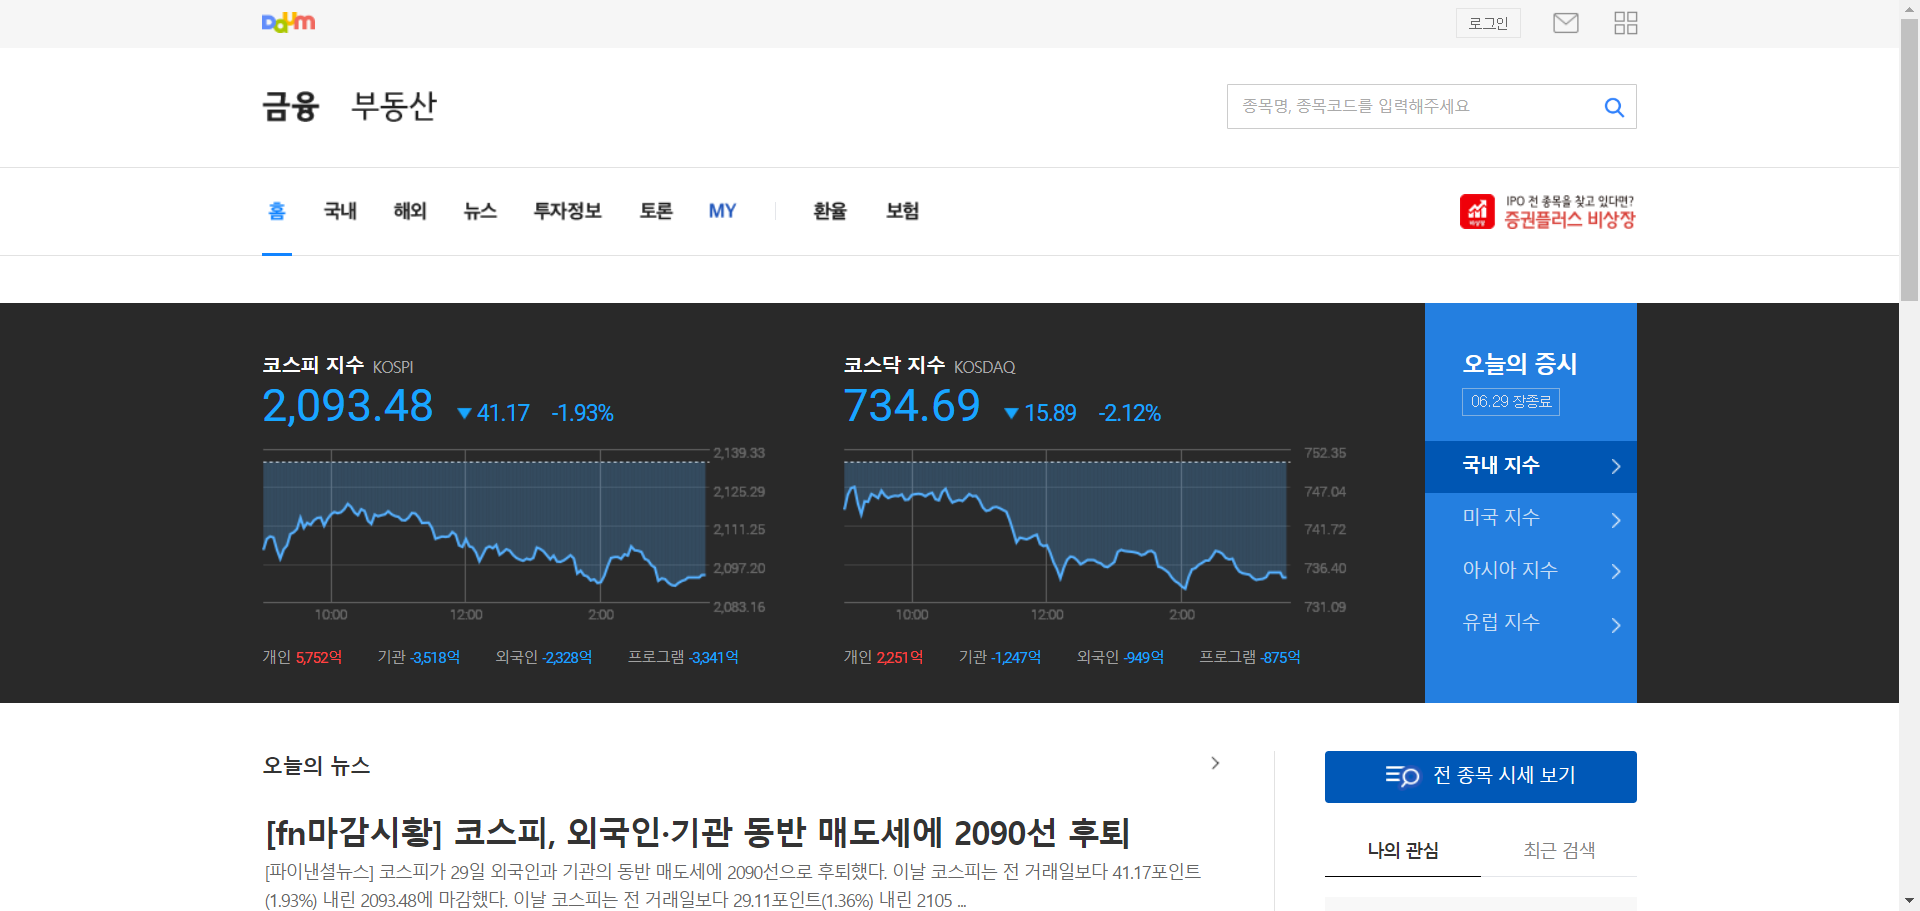

In [18]:
Image('img/daum_main.png')

## 1. 주요 지표 크롤링
### 1-1. 국내외 지수 가져오기
>국내지수, 미국지수, 아시아지수, 유럽지수
### 1-2. 환율 및 주요지표
>주요국 환율 및 주요지표

##### 2. 국내 증시 크롤링
##### 3. 원하는 종목 지정해서 크롤링하기

#### request 기본 워밍업

In [1]:
import requests

> 상태부터 확인하기

In [2]:
e = requests.session()
res = e.get('https://finance.daum.net/')

> 객체 확인법

In [3]:
dir(res)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [4]:
res.ok

True

In [5]:
print(res.headers)

{'Date': 'Mon, 03 Jul 2023 05:09:24 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'X-Frame-Options': 'SAMEORIGIN', 'Strict-Transport-Security': 'max-age=15552000; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'ETag': 'W/"24c4-Ejp5ezE26zKpsKB9GXf8MUWUoA8"', 'Content-Encoding': 'gzip'}


In [6]:
print(res.__attrs__)

['_content', 'status_code', 'headers', 'url', 'history', 'encoding', 'reason', 'cookies', 'elapsed', 'request']


In [7]:
print(res.status_code)

200


- 세션 비활성화 *

- 굳이 할 필요는 없지만 시스템화해서 서버에 올린다면 꼭 해줘야 하는 작업

- close를 안해주면 크롬창을 계속 새로 띄우는 것과 같음

- with문을 이용해서 세션을 자동으로 닫을 수도 있음

In [8]:
e.close()

### 1-1. 국내외 지수 가져오기

In [8]:
import requests
import json

In [9]:
dir(requests)

['ConnectTimeout',
 'ConnectionError',
 'DependencyWarning',
 'FileModeWarning',
 'HTTPError',
 'JSONDecodeError',
 'NullHandler',
 'PreparedRequest',
 'ReadTimeout',
 'Request',
 'RequestException',
 'RequestsDependencyWarning',
 'Response',
 'Session',
 'Timeout',
 'TooManyRedirects',
 'URLRequired',
 '__author__',
 '__author_email__',
 '__build__',
 '__builtins__',
 '__cached__',
 '__cake__',
 '__copyright__',
 '__description__',
 '__doc__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__title__',
 '__url__',
 '__version__',
 '_check_cryptography',
 '_internal_utils',
 'adapters',
 'api',
 'auth',
 'certs',
 'chardet_version',
 'charset_normalizer_version',
 'check_compatibility',
 'codes',
 'compat',
 'cookies',
 'delete',
 'exceptions',
 'get',
 'head',
 'hooks',
 'logging',
 'models',
 'options',
 'packages',
 'patch',
 'post',
 'put',
 'request',
 'session',
 'sessions',
 'ssl',
 'status_codes',
 'structures',
 'urllib3',
 

In [11]:
e = requests.session()
base_url = 'http://finance.daum.net/api/quotes/today?'

##### 미국지수 요청 url

In [10]:
url = 'http://finance.daum.net/api/quotes/today?type=USA'

In [11]:
res = e.get(url)

In [12]:
res.ok

False

성공했다면 res.ok가 True가 나와야함 그러나 False가 나왔으므로 문제가 생긴것인데
어떤 문제 인지 알고 싶다면 reason을 찍어보면 됨

In [13]:
res.reason

'Forbidden'

Forbidden이 나온것은 daum금융 서버에서 우리의 요청을 특별한 이유로 허가하지 않은 경우임

대게 이런경우 headers 값을 비워서 요청을 날려서 그런 것인데 실제로 우리가 크롬을 통해서 요청을하면 헤더값이 채워져있음

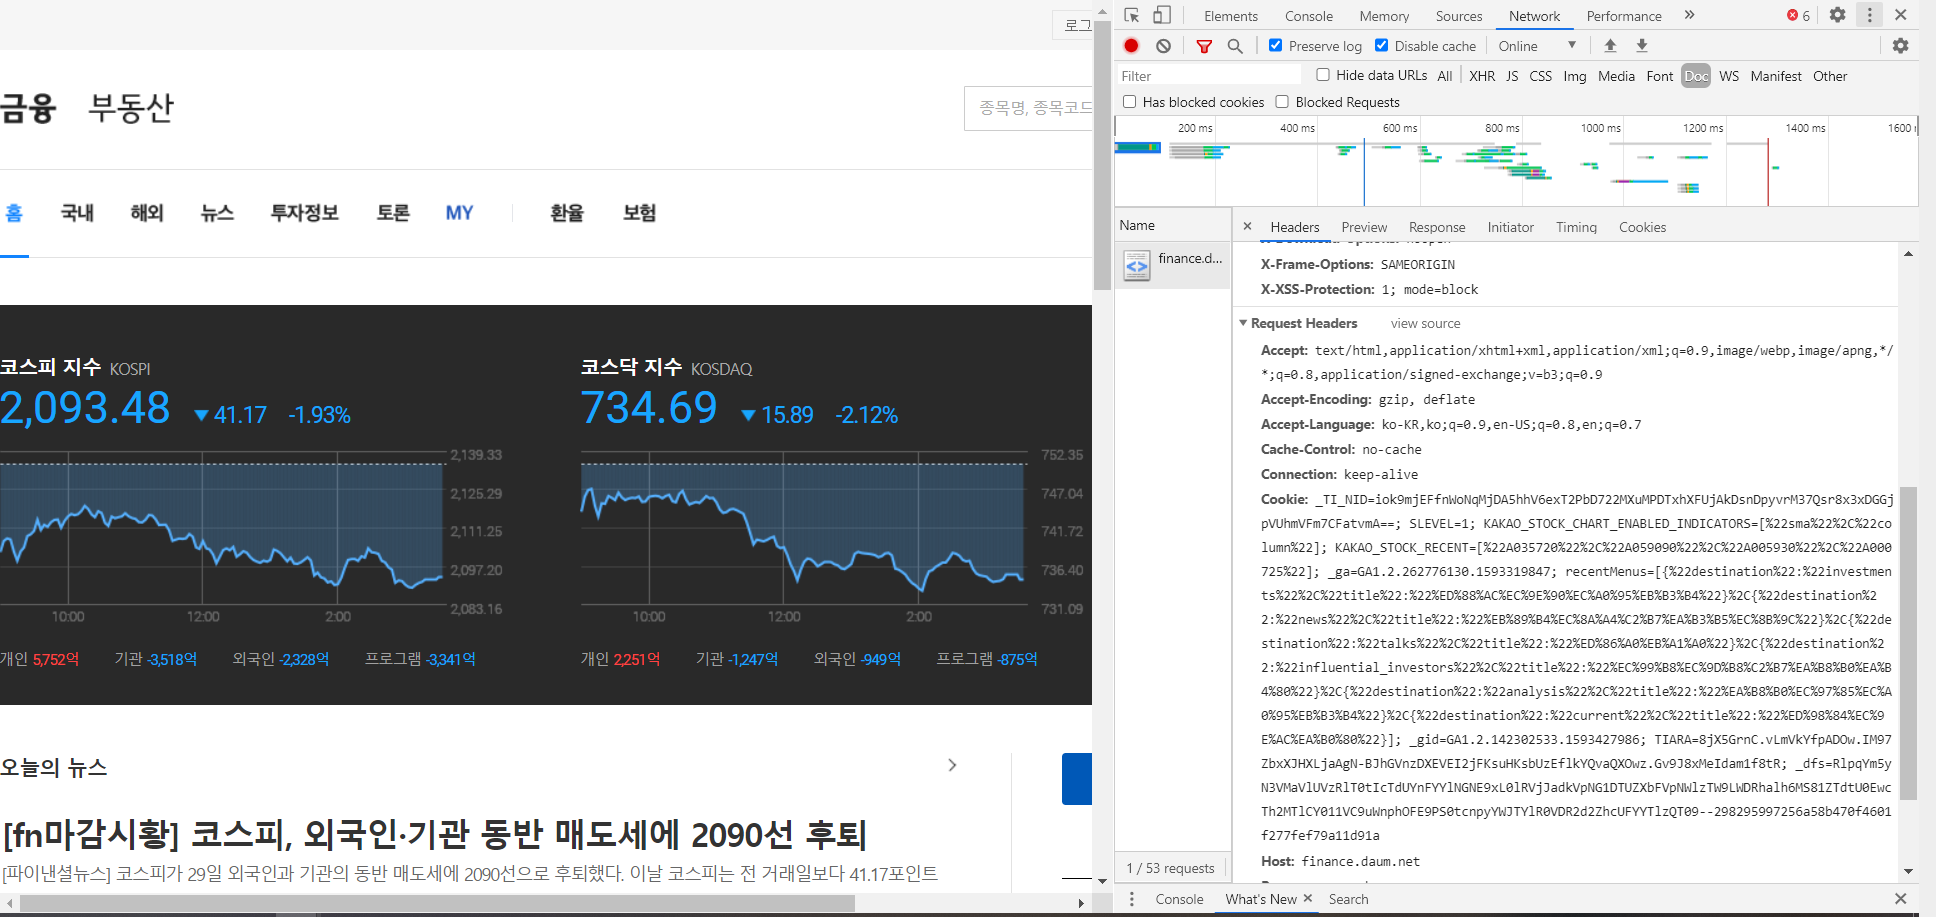

In [19]:
Image('img/daum_main2.png')

크롬 개발자도구를 키면 우리가 날리는 요청값을 볼 수 있는데 여기에 Request Headers라는 부분 Headers임

여기에는 어떤 웹브라우저로 요청을 보내는지, 어떤 쿠키값인지, 이전 페이지가 어디었는지 등을 알 수 있음

주로 중요하게 여기는 부분이 user-agent, referer임

In [14]:
headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36',
        'Referer': 'http://finance.daum.net/'}

다음과 같이 header를 담아서 requests를 보내게 되는데 여기서
user-agent는 어떤 환경의 사용자가 요청하는지에 대한 내용이고 referer는 이 요청을 날리기 전에 페이지가 어디인지 알려주는 정보임

user-agent를 채우지 않으면 해당 부분에 python bot이 날리는 것을 daum서버가 알 수 있음

referer같은 경우 해당 경우 채워줘야 하는 이유는 

지금 요청하는 값이 html가 담겨있는 페이지를 요청하는 것이 아니라 비어있는 html일부를 채워주기 위해서 데이터를 따로 요청하는 부분으로 
브라우저를 사용하면 'http://finance.daum.net/api/quotes/today?type=USA'를 요청하기 위해서 referer가 당연히 http://finance.daum.net/로 나타나야 함 그러나 referer를 비우고 요청하면 robot이 요청하는 것을 식별할 수 있기 때문에 접근을 거부함

In [15]:
res = e.get(url, headers= headers)
res.ok

True

In [16]:
data_list = res.json().get('data')

tyep 은 USA로 미국지수 데이터를 가지고왔음

가져온 데이터의 리스트를 보니 2가지 데이터로 다음금융에서 나타낸 것 과 같이
미국 다우 산업, 미국 나스닥 종합 2가지의 데이터를 가지고옴

In [17]:
len(data_list)

2

In [18]:
data_list[0]

{'symbolCode': 'US.DJI',
 'code': 'US.DJI',
 'openingPrice': 34269.92,
 'highPrice': 34467.35,
 'lowPrice': 34269.92,
 'tradePrice': 34407.6,
 'prevClosingPrice': 34122.42,
 'change': 'RISE',
 'changePrice': 285.18,
 'changeRate': 0.0083575549,
 'name': '미국 다우 산업',
 'date': '2023-06-30',
 'tradeDate': '20230630',
 'tradeTime': '160337',
 'exchangeDate': '2023-06-30 16:03:37',
 'exchangeCountry': 'USA',
 'securityGroup': None,
 'market': 'DJI',
 'isIndex': True,
 'accTradePrice': 0,
 'accTradeVolume': 339849717,
 'prevAccTradeVolume': None,
 'prevAccTradeVolumeChangeRate': None,
 'marketCap': 0,
 'marketCapRank': None,
 'high52wPrice': 34712.28,
 'high52wDate': '2022-12-13',
 'low52wPrice': 28660.94,
 'low52wDate': '2022-10-13',
 'basePrice': 34122.42,
 'upperLimitPrice': None,
 'lowerLimitPrice': None,
 'foreignRatio': None,
 'prevForeignRatio': None,
 'foreignOwnShares': None,
 'parValue': None,
 'eps': None,
 'dps': None,
 'per': None,
 'bps': None,
 'pbr': None,
 'sectorCode': None,

모든 데이터가 유의미하지 않으므로 필요한 부분만 가져가도록 하겠음.

웹페이지의 데이터와 비교하다보면 어떤키가 정확히 어떤 값인지 알 수 있음

테스트를 위해서 data_dict에 값을 인덱스를 주어서 넣어보겟음

In [19]:
data_dict={}

In [20]:
data_dict['name']=data_list[0]['name']
data_dict['sectorCode']= data_list[0]['sectorCode']
data_dict['tradePrice']=data_list[0]['tradePrice']
data_dict['changePrice']=data_list[0]['changePrice']
data_dict['changeRate']=data_list[0]['changeRate']
data_dict['highInYearPrice']=data_list[0]['highInYearPrice']
data_dict['lowInYearPrice']=data_list[0]['lowInYearPrice']
print(data_dict)


{'name': '미국 다우 산업', 'sectorCode': None, 'tradePrice': 34407.6, 'changePrice': 285.18, 'changeRate': 0.0083575549, 'highInYearPrice': 34588.68, 'lowInYearPrice': 31429.82}


data_list가 하나가 아니므로 for문을 통해서 데이터를 추출하고자 함.

현재는 2개밖에 안되기 때문에 인덱스를 직접 주어도 되지만

data_list의 데이터가 많아질 수록 인덱스를 직접 주는 것은 비효율적이기 때문에 for문을 통하여 해당 작업을 수행하고자함

In [21]:
index_list = []
for data in data_list:
    data_dict={}
    data_dict['name']=data['name']
    data_dict['sectorCode']= data['sectorCode']
    data_dict['tradePrice']=data['tradePrice']
    data_dict['changePrice']=data['changePrice']
    data_dict['changeRate']=data['changeRate']
    data_dict['highInYearPrice']=data['highInYearPrice']
    data_dict['lowInYearPrice']=data['lowInYearPrice']
    index_list.append(data_dict)

In [22]:
index_list

[{'name': '미국 다우 산업',
  'sectorCode': None,
  'tradePrice': 34407.6,
  'changePrice': 285.18,
  'changeRate': 0.0083575549,
  'highInYearPrice': 34588.68,
  'lowInYearPrice': 31429.82},
 {'name': '나스닥 종합',
  'sectorCode': None,
  'tradePrice': 13787.923,
  'changePrice': 196.592,
  'changeRate': 0.0144645142,
  'highInYearPrice': 13864.061,
  'lowInYearPrice': 10265.039}]

pandas의 데이터프레임을 통해서 깔끔한 표의 형태로 데이터를 볼 수 있음

In [23]:
import pandas as pd

In [24]:
df = pd.DataFrame(index_list)
df

name sectorCode  tradePrice  changePrice  changeRate  highInYearPrice  \
0  미국 다우 산업       None   34407.600      285.180    0.008358        34588.680   
1    나스닥 종합       None   13787.923      196.592    0.014465        13864.061   

   lowInYearPrice  
0       31429.820  
1       10265.039

위의 예시는 미국지수만 가져온 것으로 메인 페이지에는 국내지수, 미국지수, 아시아지수, 유럽지수가 있음.

해당 데이터를 가지고 오기 위해서 url을 파악하면 type이라는 값만 변하는 것을 알 수 있음

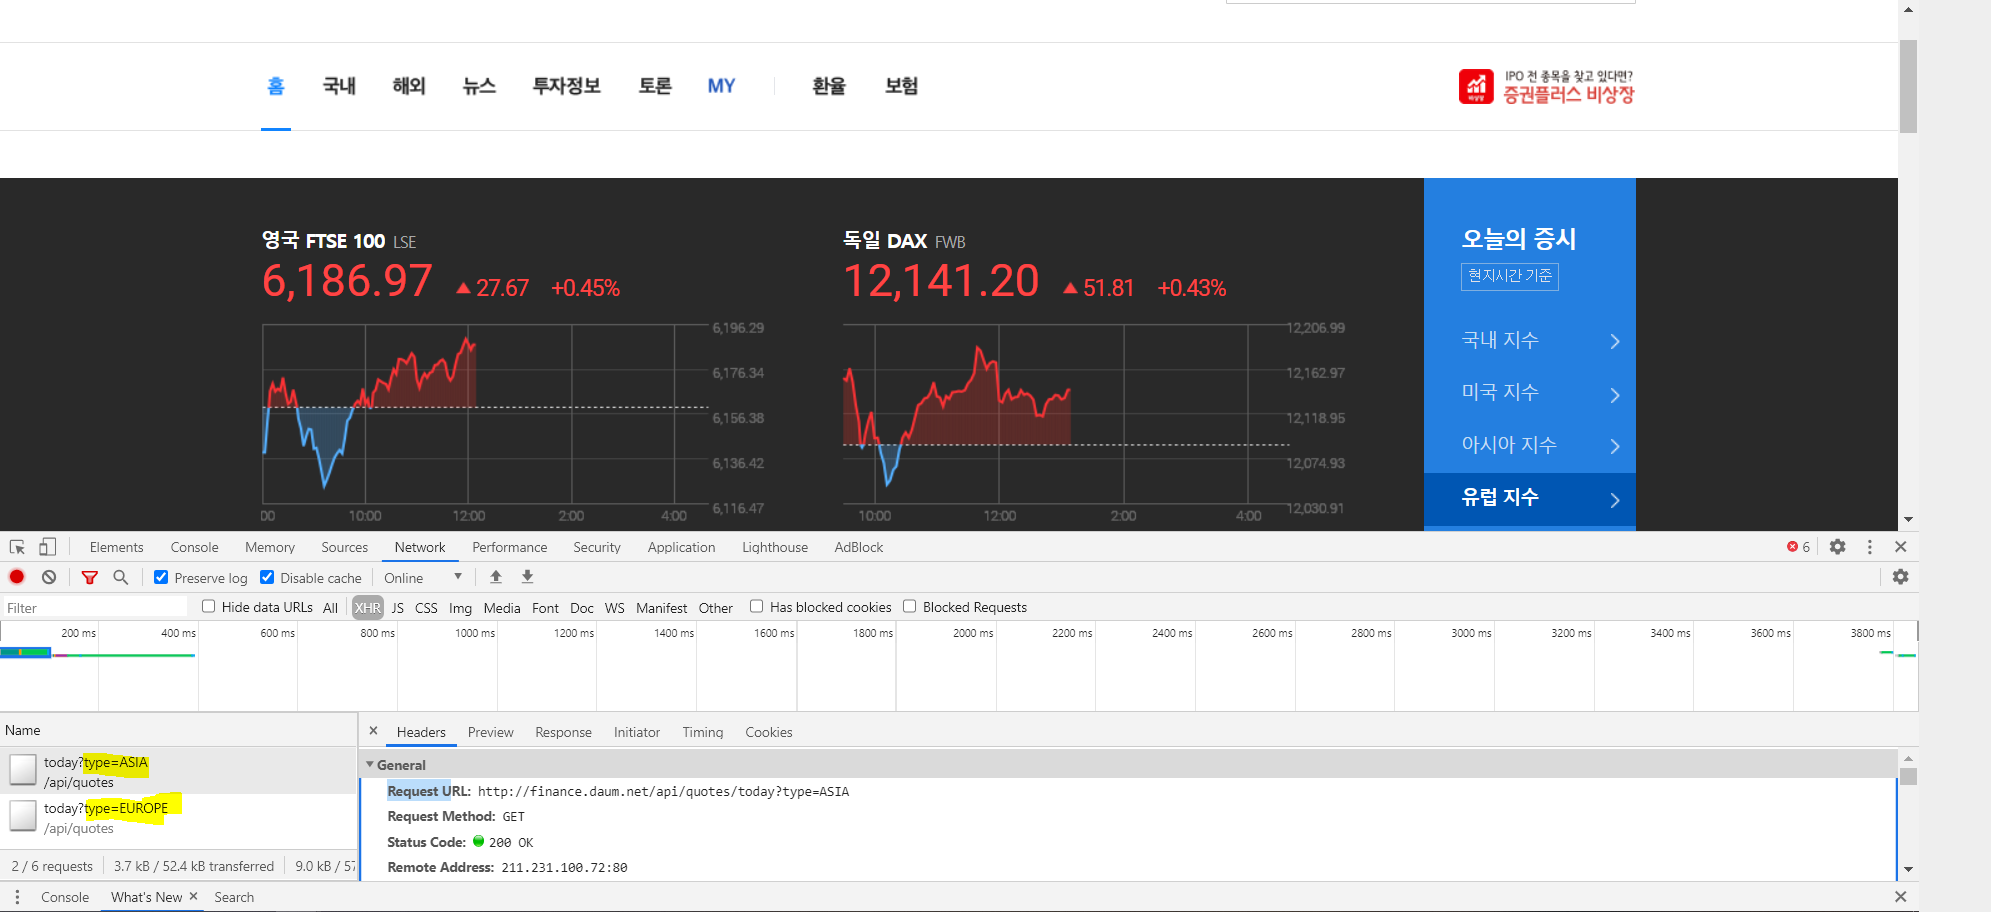

In [31]:
Image('img/daum_main3.png')

어떤 type이 있는지 파악한 후 list에 넣어줌

In [25]:
params = ['DOMESTIC', 'USA', 'ASIA', 'EUROPE']

In [26]:
for param in params:
    print(param)

DOMESTIC
USA
ASIA
EUROPE


In [27]:
for param in params:
    url = f'http://finance.daum.net/api/quotes/today?type={param}'
    print(url)

http://finance.daum.net/api/quotes/today?type=DOMESTIC
http://finance.daum.net/api/quotes/today?type=USA
http://finance.daum.net/api/quotes/today?type=ASIA
http://finance.daum.net/api/quotes/today?type=EUROPE


서버에 부하를 주는 것을 방지하기 위해 time sleep을 준다

In [28]:
import time

for 문을 통해서 반복되는 작업을 줄이고 

daum서버에 부하를 주는 것을 방지하기 위해서 time.sleep을 사용한다. (물론 여기서 2초까지 필요는 없음)

print문을 삽입하여 요청하는 url과 응답의 상태를 확인한다

In [29]:
headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36',
        'Referer': 'http://finance.daum.net/'}

for param in params:
    e = requests.session()
    url = f'http://finance.daum.net/api/quotes/today?type={param}'
    res = e.get(url, headers=headers)
    print(url)
    print(res.ok)
    
    e.close()
    time.sleep(2)

http://finance.daum.net/api/quotes/today?type=DOMESTIC
True
http://finance.daum.net/api/quotes/today?type=USA
True
http://finance.daum.net/api/quotes/today?type=ASIA
True
http://finance.daum.net/api/quotes/today?type=EUROPE
True


요청이 제대로간다면 데이터를 받아서 파싱하는 부분까지 만들어준다

In [30]:
headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36',
        'Referer': 'http://finance.daum.net/'}

index_list = []
for param in params:
    e = requests.session()
    url = f'http://finance.daum.net/api/quotes/today?type={param}'
    res = e.get(url, headers=headers)
    data_list = res.json().get('data')
    
    for data in data_list:
        data_dict={}
        data_dict['name']=data['name']
        data_dict['market']= data['market']
        data_dict['tradePrice']=data['tradePrice']
        data_dict['changePrice']=data['changePrice']
        data_dict['changeRate']=data['changeRate']
        data_dict['highInYearPrice']=data['highInYearPrice']
        data_dict['lowInYearPrice']=data['lowInYearPrice']
        index_list.append(data_dict)
    
    e.close()
    time.sleep(2)

In [31]:
index_list

[{'name': '코스피',
  'market': 'KOSPI',
  'tradePrice': 2596.54,
  'changePrice': 32.26,
  'changeRate': 0.0125805294,
  'highInYearPrice': 2650.45,
  'lowInYearPrice': 2180.67},
 {'name': '코스닥',
  'market': 'KOSDAQ',
  'tradePrice': 886.5,
  'changePrice': 18.26,
  'changeRate': 0.0210310513,
  'highInYearPrice': 913.97,
  'lowInYearPrice': 660.32},
 {'name': '미국 다우 산업',
  'market': 'DJI',
  'tradePrice': 34407.6,
  'changePrice': 285.18,
  'changeRate': 0.0083575549,
  'highInYearPrice': 34588.68,
  'lowInYearPrice': 31429.82},
 {'name': '나스닥 종합',
  'market': 'NAI',
  'tradePrice': 13787.923,
  'changePrice': 196.592,
  'changeRate': 0.0144645142,
  'highInYearPrice': 13864.061,
  'lowInYearPrice': 10265.039},
 {'name': '중국 상해 종합',
  'market': 'SHS',
  'tradePrice': 3244.85,
  'changePrice': 42.788,
  'changeRate': 0.0133626394,
  'highInYearPrice': 3418.953,
  'lowInYearPrice': 3073.054},
 {'name': '일본 니케이 225',
  'market': 'NII',
  'tradePrice': 33751.92,
  'changePrice': 562.88,
  '

In [32]:
import pandas as pd

In [33]:
df = pd.DataFrame(index_list)
df

name  market  tradePrice  changePrice  changeRate  highInYearPrice  \
0          코스피   KOSPI    2596.540       32.260    0.012581         2650.450   
1          코스닥  KOSDAQ     886.500       18.260    0.021031          913.970   
2     미국 다우 산업     DJI   34407.600      285.180    0.008358        34588.680   
3       나스닥 종합     NAI   13787.923      196.592    0.014465        13864.061   
4     중국 상해 종합     SHS    3244.850       42.788    0.013363         3418.953   
5   일본 니케이 225     NII   33751.920      562.880    0.016960        33772.890   
6  영국 FTSE 100     LSE    7531.530       59.840    0.008009         8047.060   
7       독일 DAX     FWB   16147.900      201.180    0.012616        16427.420   

   lowInYearPrice  
0        2180.670  
1         660.320  
2       31429.820  
3       10265.039  
4        3073.054  
5       25661.890  
6        7206.820  
7       13976.440

##### 지수 선택해서 가져오기
사용했던 코드를 함수화하고 어떤 지표를 가지고 올지 변수로 받는 것으로함

In [34]:
#params = ['DOMESTIC', 'USA', 'ASIA', 'EUROPE']

def index_crawl(params:list):
    headers={
        'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36',
        'Referer': 'http://finance.daum.net/'
    }
    index_list = []
    for param in params:
        print('start:'+param)
        e = requests.session()
        url = f'http://finance.daum.net/api/quotes/today?type={param}'
        res = e.get(url, headers=headers)
        data_list = res.json().get('data')

        for data in data_list:
            data_dict={}
            data_dict['name']=data['name']
            data_dict['market']= data['market']
            data_dict['tradePrice']=data['tradePrice']
            data_dict['changePrice']=data['changePrice']
            data_dict['changeRate']=data['changeRate']
            data_dict['highInYearPrice']=data['highInYearPrice']
            data_dict['lowInYearPrice']=data['lowInYearPrice']
            index_list.append(data_dict)

        e.close()
        print('end:'+param)
        time.sleep(2)
    df = pd.DataFrame(index_list)
    return df

In [39]:
params= ['USA']

In [40]:
params

['USA']

In [41]:
df = index_crawl(params)

start:USA
end:USA


In [42]:
df

name market  tradePrice  changePrice  changeRate  highInYearPrice  \
0  미국 다우 산업    DJI   34407.600      285.180    0.008358        34588.680   
1    나스닥 종합    NAI   13787.923      196.592    0.014465        13864.061   

   lowInYearPrice  
0       31429.820  
1       10265.039

## 1-2. 환율 및 주요지표

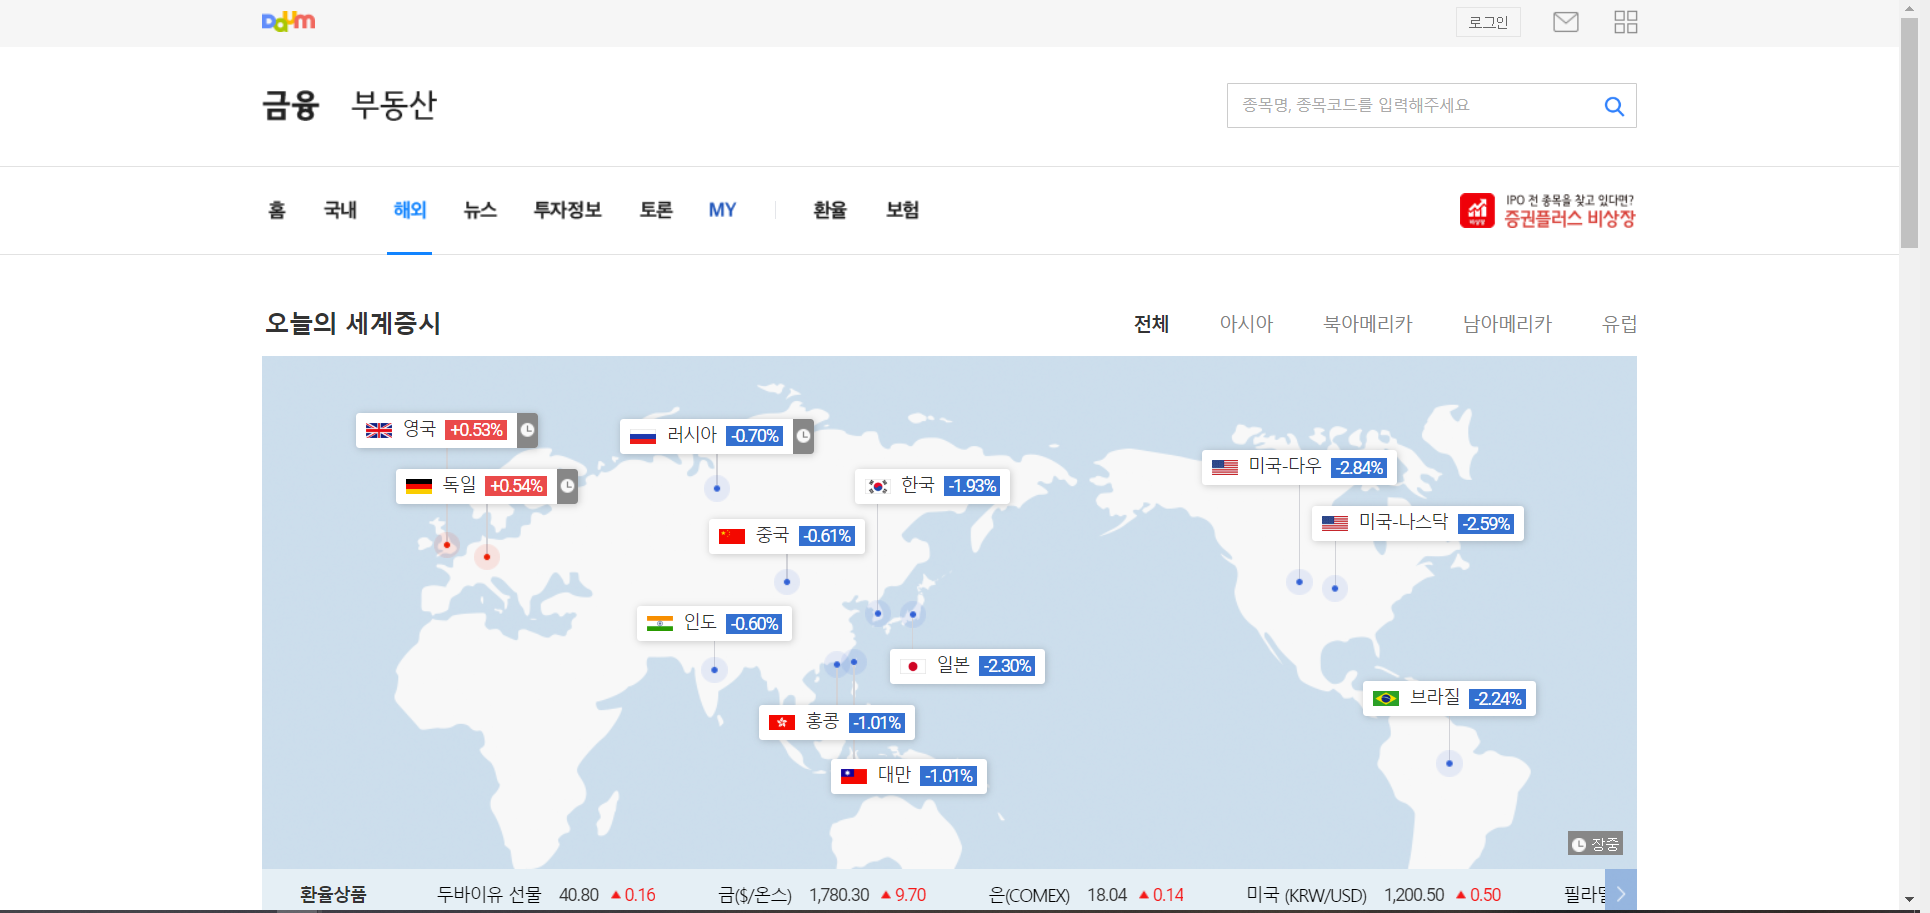

In [47]:
Image('img/daum_main4.png')

해외 부분에 있는 주요 지표들 가져오기

In [43]:
import requests

In [44]:
e = requests.session()
res = e.get('http://finance.daum.net/global')

In [45]:
res.ok

True

In [46]:
res.text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta property="og:site_name" content="다음금융" />\n<meta property="og:image" content="https://t1.daumcdn.net/media/finance_og.png" />\n<link rel="shortcut icon" href="//finance.daum.net/favicon.ico" type="image/x-icon" />\n\n<title>해외 | 다음 금융 </title>\n\n<link rel="stylesheet" type="text/css" href="/dist/common.css?v=1683640229" />\n<link rel="stylesheet" type="text/css" href="/dist/custom.ui.css?v=1683640229" />\n\n<script>\n    window.REQUEST_URI = \'/global\';\n    window.CURRENT_URL = encodeURIComponent(\n        "".concat(\n            window.location.protocol,\n            "//",\n            window.location.host,\n            window.location.pathname,\n            window.location.search\n        )\n    );\n    window.FINANCE = {};\n    window.FINANCE.BASE_URL = \'/dist\';\n    window.FINANCE.VERSION = \'16836

기본으로 불러오는 html에 정보가 없음
json으로 정보를 따로 호출해야함!

In [47]:
from fake_useragent import UserAgent
import requests
ua = UserAgent()
# 헤더 선언
headers = {
    'User-Agent': ua.ie,
    'referer': 'http://finance.daum.net/global'
}

In [48]:
headers

{'User-Agent': 'Mozilla/4.0 (Mozilla/4.0; MSIE 7.0; Windows NT 5.1; FDM; SV1)',
 'referer': 'http://finance.daum.net/global'}

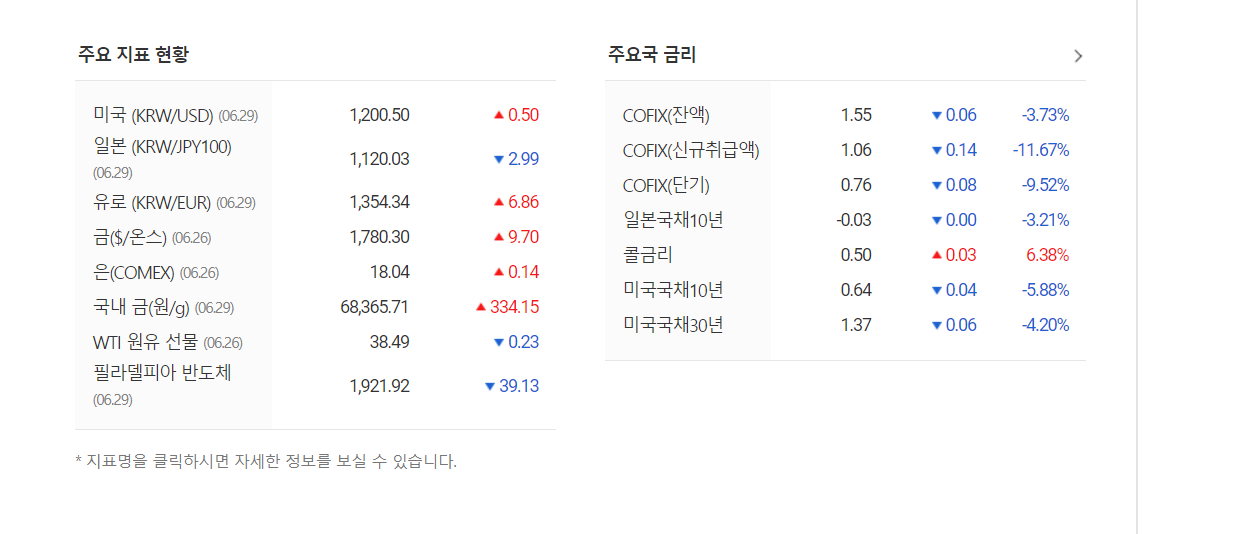

In [54]:
Image('img/daum_main5.png')

In [49]:
url='http://finance.daum.net/api/global/major_indexes'

In [50]:

e = requests.session()

In [51]:
res=  e.get(url)
res.ok

False

In [52]:
res=  e.get(url, headers=headers)
res.ok

True

In [53]:
data = res.json()

data

[{'symbolCode': 'FOREX-FRX.KRWUSD',
  'name': '미국 (USD/KRW)',
  'date': '2023-07-03',
  'country': '미국',
  'region': 'america',
  'tradePrice': 1307.2,
  'tradeDate': '2023-07-03',
  'change': 'FALL',
  'changeRate': -0.0089461713,
  'changePrice': -11.8},
 {'symbolCode': 'FOREX-FRX.KRWJPY',
  'name': '일본 (JPY100/KRW)',
  'date': '2023-07-03',
  'country': '일본',
  'region': 'asia',
  'tradePrice': 905.22,
  'tradeDate': '2023-07-03',
  'change': 'FALL',
  'changeRate': -0.0094435629,
  'changePrice': -8.63},
 {'symbolCode': 'FOREX-FRX.KRWEUR',
  'name': '유로 (EUR/KRW)',
  'date': '2023-07-03',
  'country': '유로',
  'region': 'europe',
  'tradePrice': 1426.85,
  'tradeDate': '2023-07-03',
  'change': 'FALL',
  'changeRate': -0.0083744527,
  'changePrice': -12.05},
 {'symbolCode': 'COMMODITY-/GCc1',
  'name': '금($/온스)',
  'date': '2023-06-30',
  'country': None,
  'region': None,
  'tradePrice': 1929.4,
  'tradeDate': '2023-06-30',
  'changeRate': 0.0059961416,
  'changePrice': 11.5},
 {'s

In [54]:
df_major_index = pd.DataFrame(data)

In [55]:
df_major_index

symbolCode             name        date country   region  tradePrice  \
0  FOREX-FRX.KRWUSD     미국 (USD/KRW)  2023-07-03      미국  america    1307.200   
1  FOREX-FRX.KRWJPY  일본 (JPY100/KRW)  2023-07-03      일본     asia     905.220   
2  FOREX-FRX.KRWEUR     유로 (EUR/KRW)  2023-07-03      유로   europe    1426.850   
3   COMMODITY-/GCc1          금($/온스)  2023-06-30    None     None    1929.400   
4   COMMODITY-/SIc1         은(COMEX)  2023-06-30    None     None      23.020   
5    COMMODITY-GOLD        국내 금(원/g)  2023-07-03    None     None   80614.730   
6   COMMODITY-/CLc1        WTI 원유 선물  2023-06-30    None     None      70.640   
7            US.SOX        필라델피아 반도체         NaN    None     None    3673.059   

    tradeDate change  changeRate  changePrice  
0  2023-07-03   FALL   -0.008946      -11.800  
1  2023-07-03   FALL   -0.009444       -8.630  
2  2023-07-03   FALL   -0.008374      -12.050  
3  2023-06-30    NaN    0.005996       11.500  
4  2023-06-30    NaN    0.009738        0.222  
5  2023-07-03    NaN   -0.003245     -262.450  
6  2023-06-30    NaN    0.011165        0.780  
7  2023-06-30    NaN    0.016292       58.883

In [56]:
dir(df_major_index)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 

보고싶은 지표만 컬럼에 지정해주기

In [57]:
df_major_index = df_major_index.loc[:,['name','tradePrice','changePrice','tradeDate']]

In [58]:
df_major_index

name  tradePrice  changePrice   tradeDate
0     미국 (USD/KRW)    1307.200      -11.800  2023-07-03
1  일본 (JPY100/KRW)     905.220       -8.630  2023-07-03
2     유로 (EUR/KRW)    1426.850      -12.050  2023-07-03
3          금($/온스)    1929.400       11.500  2023-06-30
4         은(COMEX)      23.020        0.222  2023-06-30
5        국내 금(원/g)   80614.730     -262.450  2023-07-03
6        WTI 원유 선물      70.640        0.780  2023-06-30
7        필라델피아 반도체    3673.059       58.883  2023-06-30

In [59]:
url='http://finance.daum.net/api/global/major_bonds'

In [60]:
e=requests.session()
res=e.get(url, headers=headers)

In [61]:
major_bond = res.json().get('data')

In [62]:
df_major_bond = pd.DataFrame(major_bond)

In [63]:
df_major_bond = df_major_bond.loc[:,['name','tradePrice','changePrice','tradeDate']]

In [70]:
df_major_bond

name  tradePrice  changePrice   tradeDate
0     COFIX(잔액)      1.5500      -0.0600  2020-06-15
1  COFIX(신규취급액)      1.0600      -0.1400  2020-06-15
2     COFIX(단기)      0.7800       0.0200  2020-07-01
3       일본국채10년     -0.0257      -0.0008  2019-04-22
4           콜금리      0.4800      -0.0900  2020-07-01
5       미국국채10년      0.6900       0.0300  2020-07-01
6       미국국채30년      1.4300       0.0200  2020-07-01

구조가 비슷하네

In [64]:
import requests
import pandas as pd
import json
from fake_useragent import UserAgent

def _get_major(_type):
    # type = 'major_bonds' or 'major_indexes'
    base_url='http://finance.daum.net/api/global/'
    url = base_url + _type
    
    ua = UserAgent()
    headers = {'User-Agent': ua.ie,'referer': 'http://finance.daum.net/global'}
    e=requests.session()
    res=e.get(url, headers=headers)
    
    if _type == 'major_bonds':
        json_data = res.json().get('data')
    elif _type == 'major_indexes':
        json_data = res.json()
        
    df = pd.DataFrame(json_data)
    df = df.loc[:,['name','tradePrice','changePrice','tradeDate']]
    
    return df

In [65]:
df1 = _get_major('major_bonds')
df2 = _get_major('major_indexes')

In [66]:
df1

name  tradePrice  changePrice   tradeDate
0     COFIX(잔액)       3.760        0.030  2023-06-30
1  COFIX(신규취급액)       3.560        0.120  2023-06-30
2     COFIX(단기)       3.700        0.060  2023-06-28
3           콜금리       3.767        0.233  2023-06-30
4       미국국채10년       3.810       -0.040  2023-06-30
5       미국국채30년       3.850       -0.070  2023-06-30

In [67]:
df2

name  tradePrice  changePrice   tradeDate
0     미국 (USD/KRW)    1306.800      -12.200  2023-07-03
1  일본 (JPY100/KRW)     905.080       -8.770  2023-07-03
2     유로 (EUR/KRW)    1426.500      -12.400  2023-07-03
3          금($/온스)    1929.400       11.500  2023-06-30
4         은(COMEX)      23.020        0.222  2023-06-30
5        국내 금(원/g)   80686.520     -190.660  2023-07-03
6        WTI 원유 선물      70.640        0.780  2023-06-30
7        필라델피아 반도체    3673.059       58.883  2023-06-30